In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models, applications, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import cv2

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
base_path = 'chest_xray'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')

In [10]:
img_size = (224, 224)
batch_size = 32

In [11]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
scratch_checkpoint_cb = ModelCheckpoint(
    filepath='models/scratch_epoch_{epoch:02d}_valacc_{val_accuracy:.4f}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    save_best_only=False,
    verbose=1
)

In [13]:
def create_scratch_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and train scratch model
model1 = create_scratch_model()
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[scratch_checkpoint_cb])

/home/kaf/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-15 14:39:23.475750: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/kaf/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-06-15 14:39:31.567529: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-06-15 14:39:33.575889: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  1/163 ━━━━━━━━━━━━━━━━━━━━ 19:53 7s/step - accuracy: 0.2500 - loss: 0.7229

2025-06-15 14:39:34.292443: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-06-15 14:39:36.125939: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  2/163 ━━━━━━━━━━━━━━━━━━━━ 6:46 3s/step - accuracy: 0.3594 - loss: 1.0877 

2025-06-15 14:39:36.805912: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7438 - loss: 0.5488
Epoch 1: saving model to models/scratch_epoch_01_valacc_0.6875.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7442 - loss: 0.5480 - val_accuracy: 0.6875 - val_loss: 0.7775
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8703 - loss: 0.2988
Epoch 2: saving model to models/scratch_epoch_02_valacc_0.8125.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.8704 - loss: 0.2987 - val_accuracy: 0.8125 - val_loss: 0.4968
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8945 - loss: 0.2601
Epoch 3: saving model to models/scratch_epoch_03_valacc_0.7500.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.8945 - loss: 0.2601 - val_accuracy: 0.7500 - val_loss: 0.8560
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8991 - loss: 0.2506
Epoch 4: saving model to models/scratch_epoch_04_valacc_0.7500.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.8992 - loss: 0.2505 - val_accuracy: 0.7500 - val_loss: 0.8472
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9209 - loss: 0.1967
Epoch 5: saving model to models/scratch_epoch_05_valacc_0.8750.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9209 - loss: 0.1968 - val_accuracy: 0.8750 - val_loss: 0.4542
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9324 - loss: 0.1821
Epoch 6: saving model to models/scratch_epoch_06_valacc_0.7500.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9324 - loss: 0.1821 - val_accuracy: 0.7500 - val_loss: 0.8761
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9268 - loss: 0.1902
Epoch 7: saving model to models/scratch_epoch_07_valacc_0.8750.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9268 - loss: 0.1902 - val_accuracy: 0.8750 - val_loss: 0.3481
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9178 - loss: 0.2135
Epoch 8: saving model to models/scratch_epoch_08_valacc_0.6875.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9179 - loss: 0.2133 - val_accuracy: 0.6875 - val_loss: 1.2850
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9271 - loss: 0.1917
Epoch 9: saving model to models/scratch_epoch_09_valacc_0.8750.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9272 - loss: 0.1916 - val_accuracy: 0.8750 - val_loss: 0.3493
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9322 - loss: 0.1711
Epoch 10: saving model to models/scratch_epoch_10_valacc_0.7500.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9322 - loss: 0.1711 - val_accuracy: 0.7500 - val_loss: 0.5203


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create the directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Callback to save model after each epoch with val_accuracy in filename
checkpoint_cb = ModelCheckpoint(
    filepath='models/mobilenetv2_epoch_{epoch:02d}_valacc_{val_accuracy:.4f}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    save_best_only=False,
    verbose=1
)


In [24]:
base_model = applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[checkpoint_cb])


Epoch 1/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 37:52 14s/step - accuracy: 0.4688 - loss: 0.9576

KeyboardInterrupt: 

In [21]:

# Fine-tuning
base_model.trainable = True
model2.compile(optimizer=optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
history2_finetuned = model2.fit(train_gen, validation_data=val_gen, epochs=5, callbacks=[checkpoint_cb])

NameError: name 'base_model' is not defined

In [14]:
def find_best_checkpoint(pattern_prefix):
    import glob, re
    files = glob.glob(f'models/{pattern_prefix}_epoch_*_valacc_*.h5')
    best_file, best_acc = None, 0.0
    for f in files:
        # Extract valacc from filename
        m = re.search(r'valacc_(\d+\.\d+)', f)
        if m:
            acc = float(m.group(1))
            if acc > best_acc:
                best_acc = acc
                best_file = f
    return best_file, best_acc

Best scratch model: models/scratch_epoch_09_valacc_0.8750.h5 with val_accuracy=0.875


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 778ms/step
Scratch Model Test Evaluation:
              precision    recall  f1-score   support

      NORMAL       0.91      0.79      0.84       234
   PNEUMONIA       0.88      0.95      0.91       390

    accuracy                           0.89       624
   macro avg       0.89      0.87      0.88       624
weighted avg       0.89      0.89      0.89       624



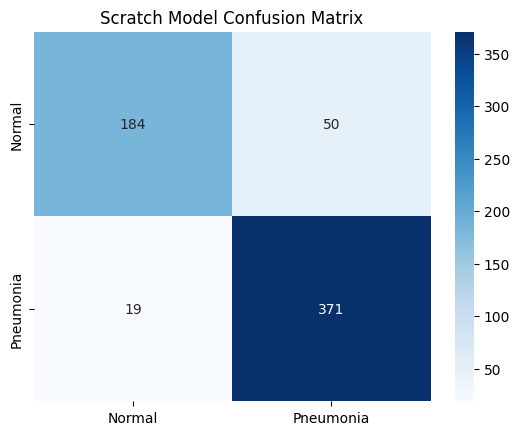

Best MobileNetV2 model: models/mobilenetv2_epoch_08_valacc_0.9375.h5 with val_accuracy=0.9375


20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
MobileNetV2 Model Test Evaluation:
              precision    recall  f1-score   support

      NORMAL       0.94      0.75      0.83       234
   PNEUMONIA       0.87      0.97      0.92       390

    accuracy                           0.89       624
   macro avg       0.90      0.86      0.87       624
weighted avg       0.89      0.89      0.88       624



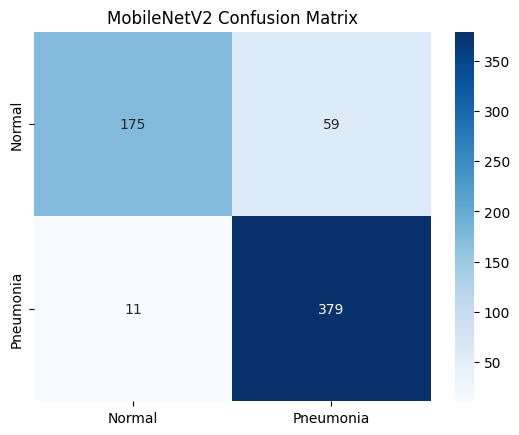

In [15]:
best_scratch_file, best_scratch_acc = find_best_checkpoint('scratch')
print(f"Best scratch model: {best_scratch_file} with val_accuracy={best_scratch_acc}")

if best_scratch_file:
    best_scratch_model = tf.keras.models.load_model(best_scratch_file)
    preds = best_scratch_model.predict(test_gen)
    y_pred = (preds > 0.5).astype(int).flatten()
    y_true = test_gen.classes
    print("Scratch Model Test Evaluation:")
    print(classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
    plt.title('Scratch Model Confusion Matrix')
    plt.show()
    # Collect metrics
    scratch_metrics = {
        'Model': 'Scratch',
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }
else:
    scratch_metrics = None

## 7. Evaluate Best Transfer Model on Test Set
best_tf_file, best_tf_acc = find_best_checkpoint('mobilenetv2')
print(f"Best MobileNetV2 model: {best_tf_file} with val_accuracy={best_tf_acc}")

if best_tf_file:
    best_tf_model = tf.keras.models.load_model(best_tf_file)
    preds_tf = best_tf_model.predict(test_gen)
    y_pred_tf = (preds_tf > 0.5).astype(int).flatten()
    y_true = test_gen.classes
    print("MobileNetV2 Model Test Evaluation:")
    print(classification_report(y_true, y_pred_tf, target_names=['NORMAL','PNEUMONIA']))
    cm2 = confusion_matrix(y_true, y_pred_tf)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
    plt.title('MobileNetV2 Confusion Matrix')
    plt.show()
    transfer_metrics = {
        'Model': 'MobileNetV2',
        'Accuracy': accuracy_score(y_true, y_pred_tf),
        'Precision': precision_score(y_true, y_pred_tf),
        'Recall': recall_score(y_true, y_pred_tf),
        'F1': f1_score(y_true, y_pred_tf)
    }
else:
    transfer_metrics = None

,Accuracy,Precision,Recall,F1
Model,,,,
Scratch,0.889423,0.881235,0.951282,0.914920
MobileNetV2,0.887821,0.865297,0.971795,0.915459


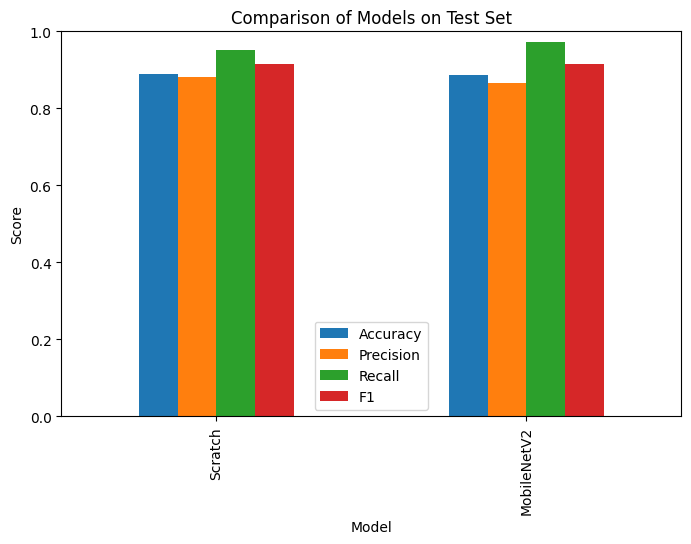

In [17]:
metrics_list = []
if scratch_metrics:
    metrics_list.append(scratch_metrics)
if transfer_metrics:
    metrics_list.append(transfer_metrics)

if metrics_list:
    df_metrics = pd.DataFrame(metrics_list).set_index('Model')
    display(df_metrics)
    # Bar plot comparison
    df_metrics.plot.bar(figsize=(8,5))
    plt.title('Comparison of Models on Test Set')
    plt.ylabel('Score')
    plt.ylim(0,1)
    plt.show()

In [7]:
def evaluate_model(model, history, model_name):
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate on test set
    test_preds = model.predict(test_gen)
    test_preds_classes = (test_preds > 0.5).astype(int)
    test_true = test_gen.classes
    
    # Classification report
    print(f"\n{classification_report(test_true, test_preds_classes, target_names=['NORMAL', 'PNEUMONIA'])}")
    
    # Confusion matrix
    cm = confusion_matrix(test_true, test_preds_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['NORMAL', 'PNEUMONIA'], 
                yticklabels=['NORMAL', 'PNEUMONIA'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Metrics
    accuracy = accuracy_score(test_true, test_preds_classes)
    precision = precision_score(test_true, test_preds_classes)
    recall = recall_score(test_true, test_preds_classes)
    f1 = f1_score(test_true, test_preds_classes)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [40]:

base_path = 'chest_xray'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')
img_size = (224, 224)


In [44]:
import matplotlib.pyplot as plt

def compute_saliency_map(model, input_image, class_index=None):
    input_image = tf.convert_to_tensor(input_image)
    input_image = tf.cast(input_image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        preds = model(input_image)
        
        if class_index is None:
            class_index = tf.argmax(preds[0])
        
        class_output = preds[:, 0]

    # Compute gradient of output w.r.t. input
    grads = tape.gradient(class_output, input_image)
    
    # Take absolute max gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    
    # Normalize
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency) + 1e-10)
    return saliency.numpy()


In [45]:
def apply_saliency_to_samples(model):
    sample_images, true_labels = load_sample_images()  # Reuse your loader
    class_map = {'NORMAL': 0, 'PNEUMONIA': 1}

    for img_array, label in zip(sample_images, true_labels):
        img_array_exp = np.expand_dims(img_array, axis=0)
        saliency_map = compute_saliency_map(model, img_array_exp, class_map[label])

        # Show original and saliency side-by-side
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img_array)
        plt.title(f"Original - {label}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(saliency_map, cmap='hot')
        plt.title("Vanilla Saliency Map")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_sample_images(target_size=(224, 224), num_samples=3):
    sample_images = []
    sample_labels = []
    
    for label in ['NORMAL', 'PNEUMONIA']:
        img_dir = os.path.join(train_dir, label)
        img_names = os.listdir(img_dir)[:num_samples]
        
        for img_name in img_names:
            img_path = os.path.join(img_dir, img_name)
            img = load_img(img_path, target_size=target_size)  # RGB by default
            img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
            sample_images.append(img_array)
            sample_labels.append(label)

    return np.array(sample_images), sample_labels


===== Scratch CNN Saliency Map =====


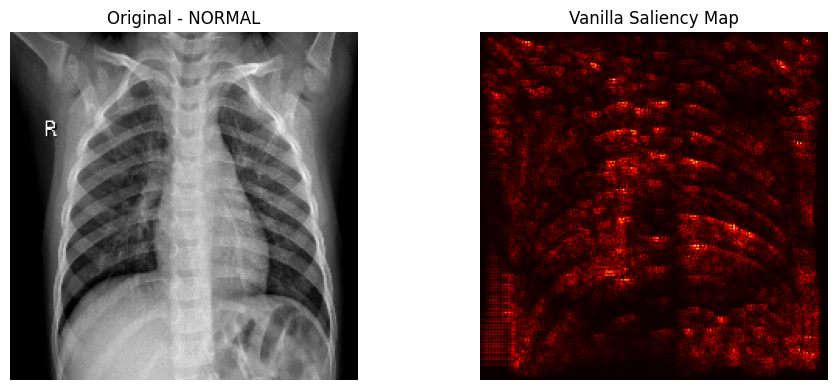

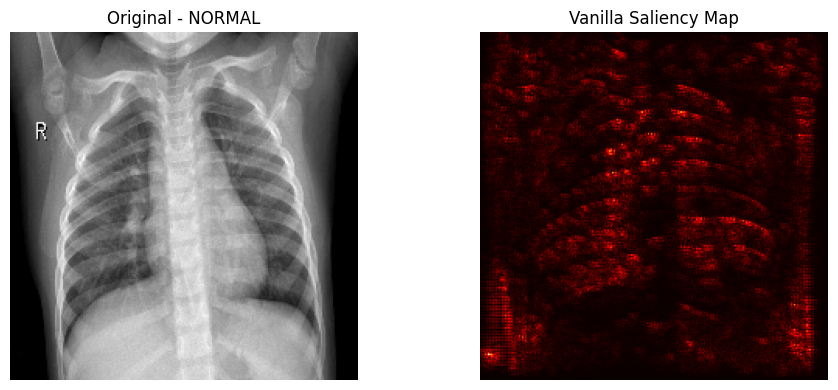

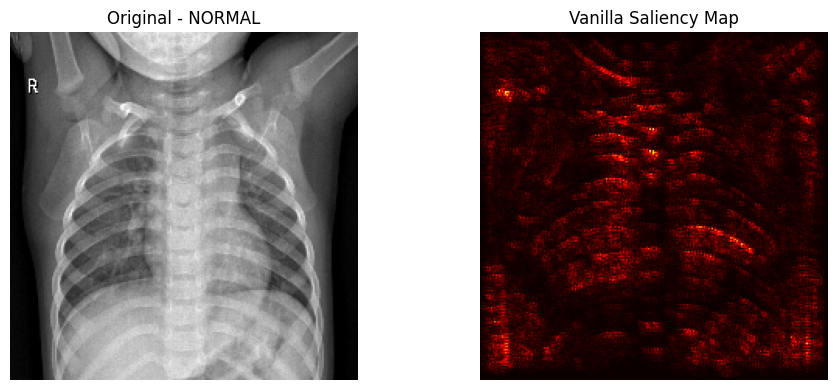

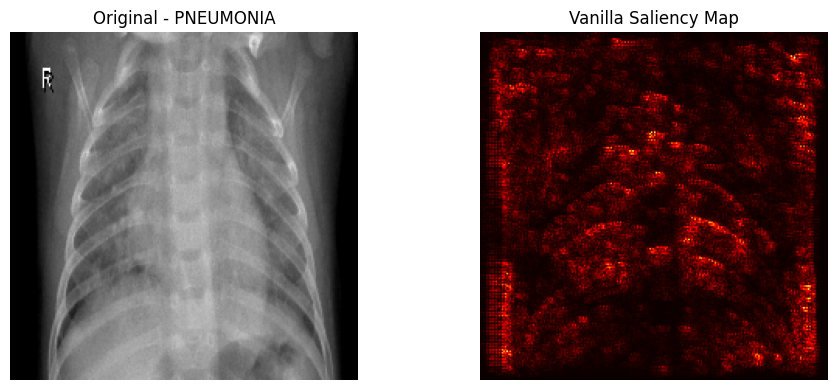

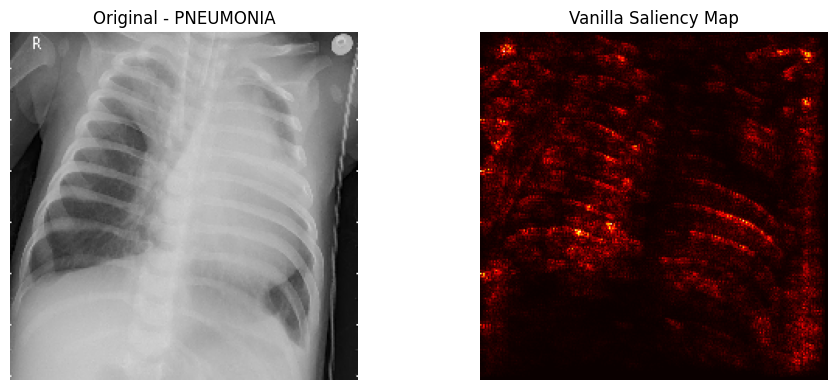

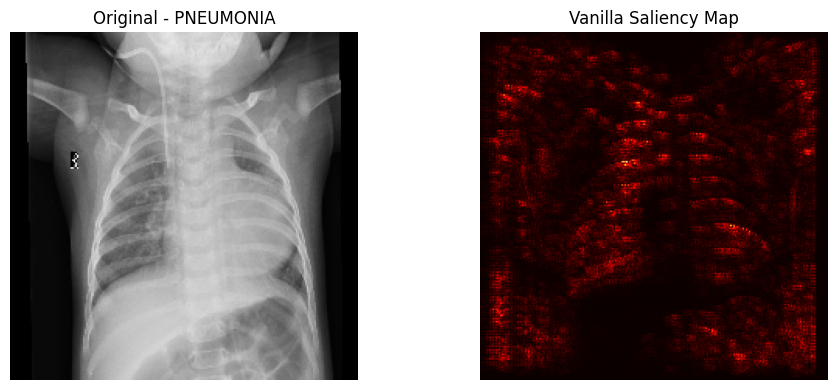

===== MobileNetV2 Saliency Map =====


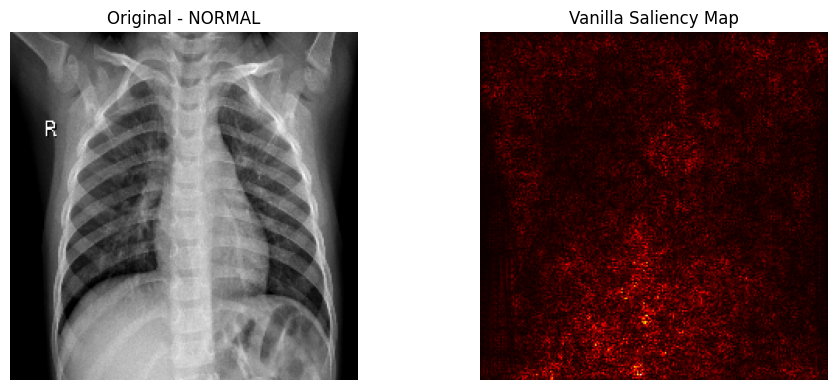

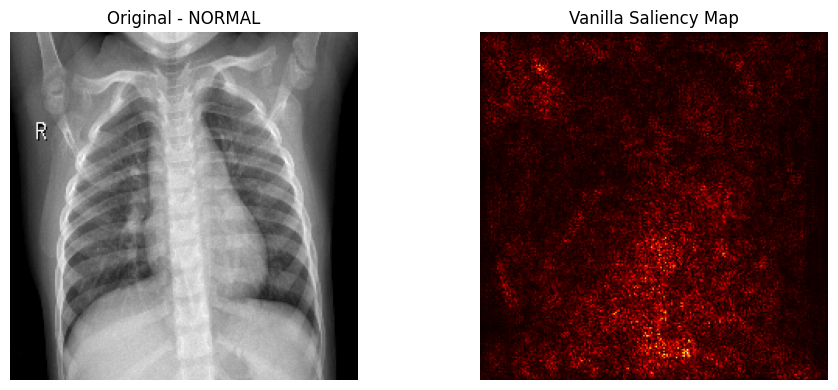

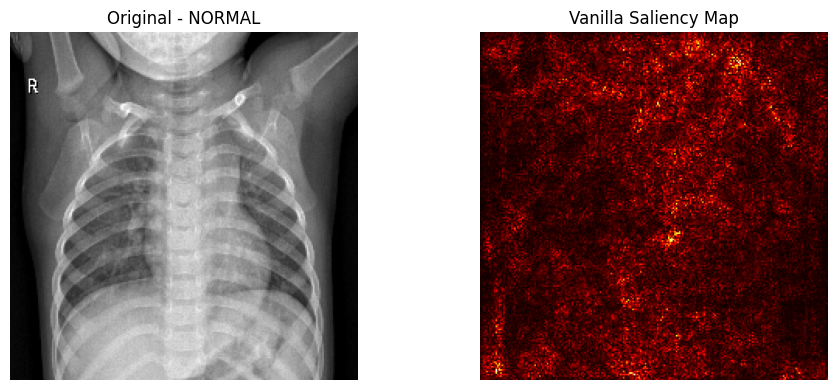

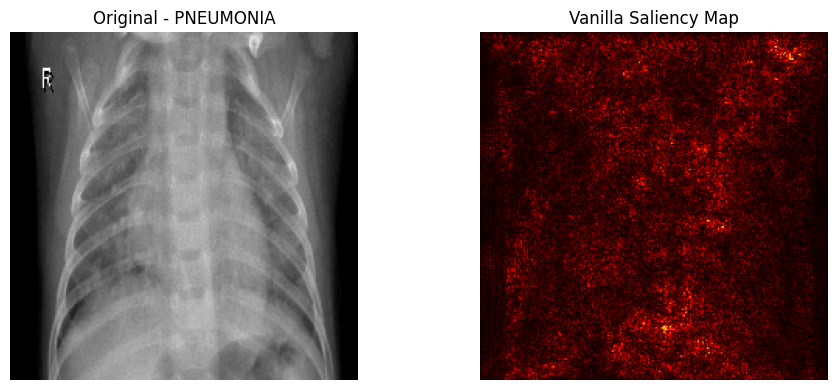

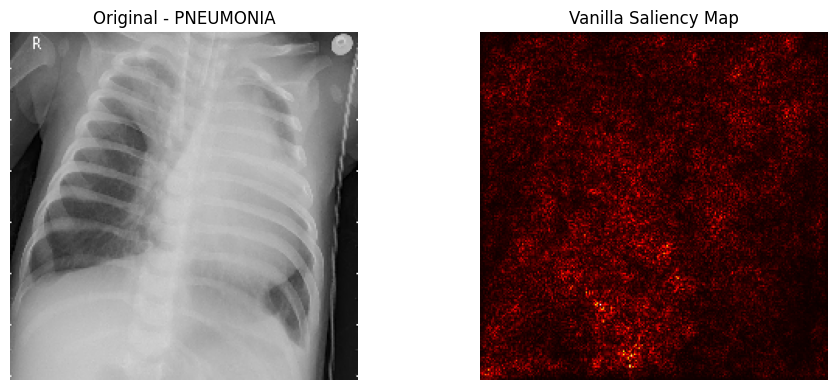

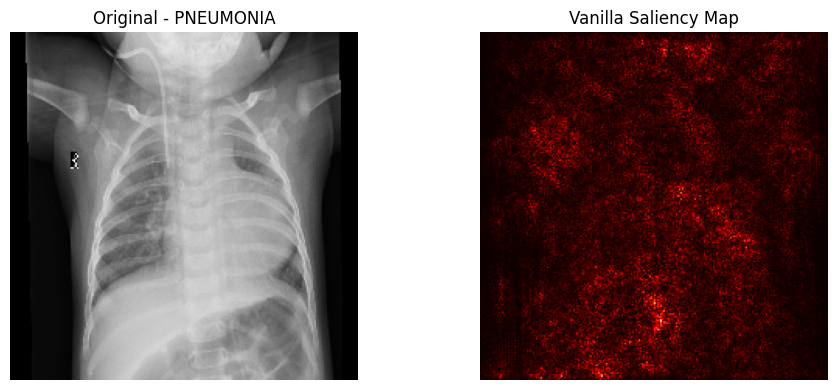

In [47]:
print("===== Scratch CNN Saliency Map =====")
apply_saliency_to_samples(model1)

print("===== MobileNetV2 Saliency Map =====")
apply_saliency_to_samples(model2)
